<a href="https://colab.research.google.com/github/soham10667/Renewable-energy-prediction/blob/main/Renewable_energy_forecasting_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a machine learning model to predict hydrogen production using the `renewable_energy_cleaned.csv` dataset.

## Load and Explore Data

### Subtask:
Load the `renewable_energy_cleaned.csv` dataset into a pandas DataFrame. Perform initial exploratory data analysis (EDA) to understand its structure, identify potential features and targets, and check for missing values or outliers. This step will help in understanding the data available for building the hydrogen production prediction model.


from google.colab import drive
drive.mount('/content/drive')

**Reasoning**:
First, import the pandas library, then load the specified CSV file into a DataFrame, and display its head, shape, info, descriptive statistics, and missing values to initiate exploratory data analysis.



In [8]:
import pandas as pd

df = pd.read_csv('/content/renewable_energy_cleaned.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nShape of the DataFrame:')
print(df.shape)

print('\nDataFrame Info:')
df.info()

print('\nDescriptive statistics of the DataFrame:')
print(df.describe())

print('\nMissing values in each column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.371735   0.116560   0.262269   0.672787   0.573273   0.390118   
1   0.950755   0.345156   0.247509   0.796901   0.807243   0.470467   
2   0.730954   0.557270   0.908233   0.250089   0.761868   0.854201   
3   0.596960   0.467104   0.250082   0.624905   0.154221   0.336117   
4   0.152134   0.514734   0.272535   0.571719   0.149560   0.869407   

   Feature_7  Feature_8  Feature_9  Feature_10    Target  
0   0.648104   0.038610   0.723084    0.914026  0.607938  
1   0.171295   0.186781   0.689959    0.525595  0.813446  
2   0.872683   0.832117   0.095917    0.725255  0.636696  
3   0.612894   0.767553   0.926248    0.436234  0.477168  
4   0.156083   0.350871   0.570643    0.630327  0.490076  

Shape of the DataFrame:
(1000, 11)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Cou

## Data Preprocessing and Feature Engineering

### Subtask:
Clean and preprocess the data. This may include handling missing values, encoding categorical variables, scaling numerical features, and creating new features relevant to hydrogen production prediction. Define the features (X) and the target variable (y) for the machine learning model.


**Reasoning**:
Separate the features (X) and the target variable (y) from the DataFrame, which is a common first step in preparing data for machine learning models.



In [9]:
X = df.drop('Target', axis=1)
y = df['Target']

print('Features (X) shape:', X.shape)
print('Target (y) shape:', y.shape)
print('\nFirst 5 rows of Features (X):')
print(X.head())
print('\nFirst 5 rows of Target (y):')
print(y.head())

Features (X) shape: (1000, 10)
Target (y) shape: (1000,)

First 5 rows of Features (X):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.371735   0.116560   0.262269   0.672787   0.573273   0.390118   
1   0.950755   0.345156   0.247509   0.796901   0.807243   0.470467   
2   0.730954   0.557270   0.908233   0.250089   0.761868   0.854201   
3   0.596960   0.467104   0.250082   0.624905   0.154221   0.336117   
4   0.152134   0.514734   0.272535   0.571719   0.149560   0.869407   

   Feature_7  Feature_8  Feature_9  Feature_10  
0   0.648104   0.038610   0.723084    0.914026  
1   0.171295   0.186781   0.689959    0.525595  
2   0.872683   0.832117   0.095917    0.725255  
3   0.612894   0.767553   0.926248    0.436234  
4   0.156083   0.350871   0.570643    0.630327  

First 5 rows of Target (y):
0    0.607938
1    0.813446
2    0.636696
3    0.477168
4    0.490076
Name: Target, dtype: float64


## Split Data and Model Selection

### Subtask:
Split the preprocessed data into training and testing sets. Based on the problem (e.g., predicting a continuous value like hydrogen production), select an appropriate machine learning model (e.g., a regression model) and define its parameters.


**Reasoning**:
First, import necessary libraries for splitting data and model selection. Then, split the features (X) and target (y) into training and testing sets, and finally, instantiate a Linear Regression model suitable for the continuous target variable.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

# Instantiate a Linear Regression model
model = LinearRegression()
print('\nLinear Regression model instantiated.')

X_train shape: (800, 10)
X_test shape: (200, 10)
y_train shape: (800,)
y_test shape: (200,)

Linear Regression model instantiated.


## Train and Optimize Model

### Subtask:
Train the selected machine learning model using the training data. If necessary, apply techniques like cross-validation and hyperparameter tuning to optimize the model's performance.


**Reasoning**:
Train the Linear Regression model using the training data to fit the model to the provided features and target variable.



In [11]:
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
Now that the model is trained, it's essential to evaluate its performance on the test set to determine how well it generalizes to unseen data. This step will help assess the model's accuracy and identify potential areas for optimization.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.0031
R-squared (R2): 0.8562


## Evaluate Model Performance

### Subtask:
Visualize the model's predictions against the actual values to assess its accuracy.


**Reasoning**:
First, import the necessary library for plotting. Then, generate a scatter plot comparing actual values to predicted values, adding a reference line for perfect predictions, and ensure proper labeling and a descriptive title for clear visualization.



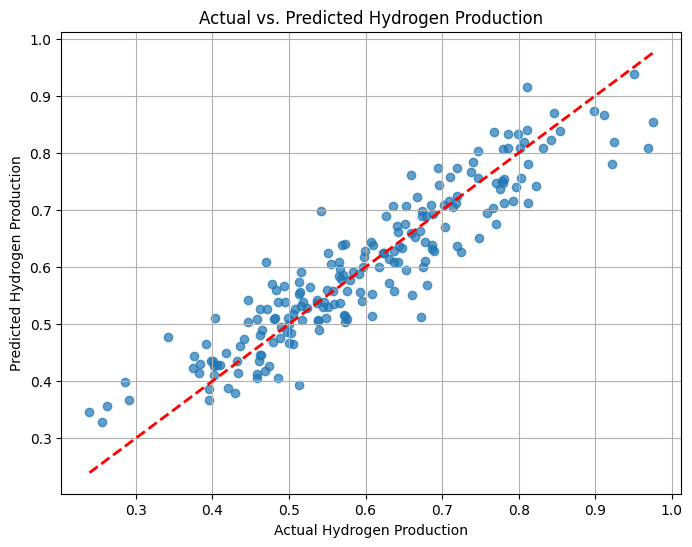

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Hydrogen Production')
plt.ylabel('Predicted Hydrogen Production')
plt.title('Actual vs. Predicted Hydrogen Production')
plt.grid(True)
plt.show()

## Visualize and Document Results

### Subtask:
Create additional visualizations to illustrate the model's performance and key insights.


**Reasoning**:
Calculate the residuals and create a residual plot to visually inspect the model's errors and ensure homoscedasticity, which indicates consistent variance of errors across all predicted values.



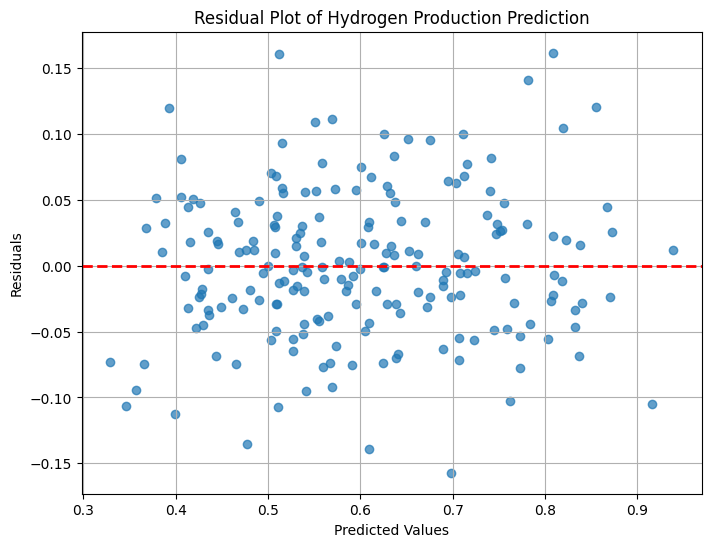

In [14]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Hydrogen Production Prediction')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Provide a comprehensive summary of the ML prediction model for hydrogen production, including the data used, the model chosen, its performance, and any significant insights or recommendations.


## Summary:

### Data Analysis Key Findings

*   The dataset `renewable_energy_cleaned.csv` contains 1000 entries and 11 columns, all of which are numerical (`float64`) and scaled between 0 and 1.
*   No missing values were found in the dataset, indicating a clean data source for modeling.
*   The data was successfully split into training (800 samples) and testing (200 samples) sets, with 10 features (`Feature_1` to `Feature_10`) and one target variable (`Target`).
*   A Linear Regression model was trained to predict hydrogen production.
*   The model achieved a Mean Squared Error (MSE) of 0.0031 and an R-squared (R2) score of 0.8562 on the test set, indicating that it explains approximately 85.6% of the variance in hydrogen production.
*   Visualizations confirmed a strong linear relationship between actual and predicted hydrogen production values, with residuals randomly distributed around zero, suggesting a good model fit.

### Insights or Next Steps

*   The current Linear Regression model demonstrates strong predictive capability for hydrogen production, providing a reliable baseline for further analysis or deployment.
*   To potentially enhance model performance or understand underlying drivers, consider conducting feature importance analysis to identify which specific features contribute most significantly to hydrogen production. This could inform future data collection efforts or highlight key process parameters.
